# Course 4: Troubleshooting and Debugging Techniques

> When debugging a problem, we want to consider the simplest explanations first and avoid jumping into complex or time-consuming solutions unless we really have to.

>Remember to always have a clear picture of what the problem is before you start solving it. 

## Week 1: Introduction to Debugging


* **Troubleshooting** is the process of identifying, analyzing and solving problems.
* **Debugging** is the process of identifying, analysing and removing bugs in a system.
* **Debuggers** let us follow the code line by line, inspect changes in variable assignments, interrupt the program when a specific condition is met and more.

### Problem solving steps:

1. Getting information

        Get as much information as you need for the current state of things. Use the documentation.
        Reproduction case: A clear description of how and when the problem appears
        The reproduction case is very important information for solving a problem.

2. Finding the root cause

        Get to the bottom of what's going on and find out what triggered the problem.
        
3. Performing the necessary remediation

        Fix the problem short term to fix the code and get the pipeline running.
        Fix the problem long term so the error doesn't happen again.

* Reminder:
       
       Throughout the whole process, it's important that we document what we do. 
       Note down the info that we get, the different things we tested to try, and figure out the root cause. 
       Finally, the steps we took to fix the issue.
       
**strace** is a command line tool that will trace a systems calls made by the program and tell us the result of each of these calls was.

**ltrace** is used to look at library calls made by the software.

Example command:

```bash
strace ./purplebox.py # Outputs the system calls to terminal
strace -o failure.strace ./purplebox.py # Outputs the system calls to failure.strace file
less failure.strace # Scroll through the file with less

# You can also use piping
strace ./purplebox.py | less # Scroll through the system calls
```

**System calls** are calls the programs running on our computer make to the running kernel.

### Understanding the problem

### 1. Problem solving questions

* What were you trying to do?
* What steps did you follow?
* What was the expected result?
* What was the actual result?

The **load average** on Linux shows how much time a processor is busy in a given minute, with one meaning it was busy for the whole minute. So normally <i><u>this number shouldn't be above the amount of processors in the computer</u></i>. 

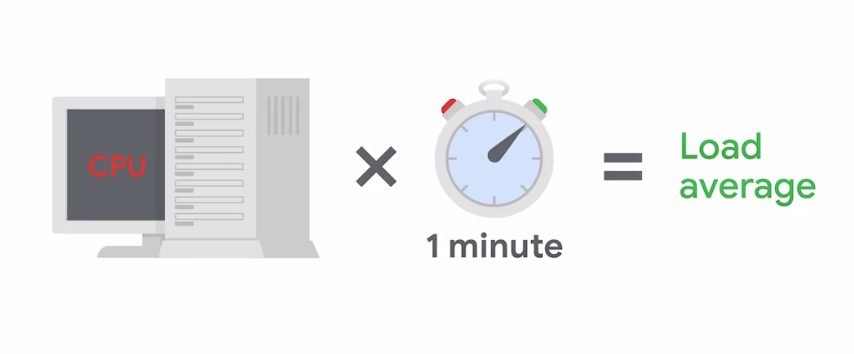

```bash
kill -STOP # stop the backup system in the video example
```

### 2.Create a Reproduction Case

**Reproduction case**: a way to verify if the problem is present or not

The first step is to read the logs available to you. Which logs to read, will depend on the operating system and the application that you're trying to debug.

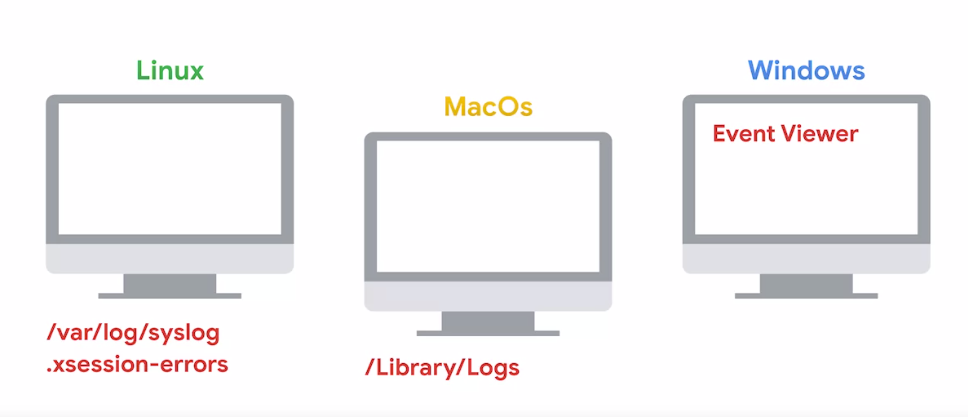

 Lots of times, you'll find an error message that will help you understand what's going on like, unable to reach server, invalid file format, or permission denied. But what if you're unlucky, and there's no error message, or the error message is super unhelpful like internal system error. 
 
The next step is to try to isolate the conditions that trigger the issue:
 
* Do other users in the same office also experienced the problem? 
* Does the same thing happen if the same user logs into a different computer? 
* Does the problem happen if the applications config directory is moved away?

### 3. Finding the Root Cause

> Understanding the root cause is essential for performing the long-term remediation.

* Whenever possible, we should check our hypotesis in a test enviroment, instead of the production enviroment that our users are working with.

Generally, understanding the root cause is essential for providing the long term solution.

Tools:
* iotop - command similar to top that let's us see what processes use the most inputs and outputs
* iostat - command that shows statistics on the input and output
* vmstat  - command that shows statistics on the virtual memory operations
* iftop - command that shows the current traffic on the network interfaces

If the issue is that the process generates too much input or output, we could use a command like ionice to make our backup system reduce its priority to access the disk and let the web services use it too. 

If the backup is eating all the network bandwidth, we could look at the documentation for the backup software and check if it already includes an option to limit the bandwidth. The rsync command, which is often used for backing up data, includes a -bwlimit, just for this purpose. If that option isn't available, we can use a program like Trickle to limit the bandwidth being used. 

### 4. Dealing with Intermitent Issues

For bugs that occur at random times, we need to repair our system to give us as much information as possible when the bug happens. This might require several iterations until we get enough information to understand the issue, but don't lose hope. Most of the time, you can finally get to the point where you can actually understand what's going on. Sometimes, the bug goes away when we add extra logging information, or when we follow the code step by step using a debugger.

**Haisenbug**:
    
    A software bug that seems to disappear or alter its behavior when one attempts to study it.

**Observer phenomenon**:

    Observing a phenomenon alters the phenomenon
    
> If a problem goes away by turning it off and on again, there's almost certainly a bug in the software, and the bug probably has to do with not managing resources correctly.


### Binary Searching a Problem

* Use the bisect method to find the error in a lenghty file.

```bash
head -15 contacts.csv # Prints the first 15 lines of the csv file
tail -15 contacts.csv # Prints the last 15 lines of the csv file
```

### Understanding Slowness

#### Slow Web Server

```bash
ab -n 500 site.example.com/ # makes 500 requests to check if the site is behaving as expected

# Use top

nice # command for starting a process with a different priority
renice # command for changing the priority of a  process that's already running
pidof # command that receives the process name and returns all the process IDs that have that name. 


# Bash oneliner to change the priority of ffmpeg from 0 to 19
for pid in $(pidof ffmpeg); do renice 19 $pid; done

# Another trick to making the website run faster is to make processes run one after the other
# instead of all at the same time
# We now want to run these processes one at a time
# We could send the CONT signal to one of them, wait till it's done, and then send it to the next one.

ps ax | less # Shows all the running processes on the computer and read with less

locate static/001.webm # command to locate the file on the computer

# Use grep to see if any files contain a call to ffmpeg
grep ffmpeg *

killall -STOP ffmpeg # Stops the process, but doesn't kill it completely

# Bash one-liner to do the ffmpeg process one by one using the CONT command
for pid in $(pidof ffmpeg); do while kill -CONT $pid; do sleep 1; done; done 
```


**Profiler**:
            
    A tool that measures the resources that our code is using, giving us a better understanding of what's going on. For example gprof for a C program and the cProfile module to analyze a python program.

### Slow Code

> If you do an expensive operation inside a loop, you multiply the time it takes to do the expensive operation by the amount of times you repeat the loop. Remeber to break out of the loop once you found what you were looking for.

Time command result explained:

* Real: The amount of actual time that it took to execute the command, sometimes called WallClock time
* User: Time spent doing operations in the user space
* Sys: Time spent doing system-level operations

Python profiler used: pprofile3

Read the profile generated: kcachegrind

```bash

# Profile command to see why the ./send_reminders.py scripts takes longer than expected
# -f to use the callgrind call format and -o to output

pprofile3 -f callgrind  -o profile.out ./send_reminders.py "2021-02-02| Example| test1, test2, test3, test4, test5, test6, test7, test8, test9"

# To read profile.out we will use kcachegrind
```

**Threads**:

     Let us run parallel tasks inside a process.

**Executor**:

    The process that's in charge of distributing the work amongst differnt workers


> A script is CPU bound if you're running operations in parallel using all available CPU time.  

**Concurrency** is a field of study dedicated to understanding how to write programs that run operations in parallel.

**Varnish** a caching service that would speed up the load of dynamically created pages of a website.

The **futures module** makes it possible to run operations in parallel using different executors. 

Concurrency articles:

* https://realpython.com/python-concurrency/

* https://hackernoon.com/threaded-asynchronous-magic-and-how-to-wield-it-bba9ed602c32

```Memory bound``` refers to a situation where the time necessary to solve a given computational task is largely dictated by the amount of memory needed to retain data. 

```Memchached``` is a caching service that keeps most commonly accessed database queries in RAM.

```rsync(remote sync)``` is a utility for efficiently transferring and synchronizing files between a computer and an external hard drive and across networked computers by comparing the modification time and size of files. 

Basic syntax in bash

```bash
rsync [Options] [Source-Files-Dir] [Destination]

#Copy or sync files locally
rsync -zvh [Source-Files-Dir] [Destination]

#Copy or sync directory locally:
rsync -zavh [Source-Files-Dir] [Destination]

#Copy files and directories recursively locally:
rsync -zrvh [Source-Files-Dir] [Destination]
```

Python script for syncing data:

```python
#Sync your data recursively from the source path to the destination path

import subprocess
src = "<source-path>" # replace <source-path> with the source directory
dest = "<destination-path>" # replace <destination-path> with the destination directory

subprocess.call(["rsync", "-arq", src, dest])
```

> In order to efficiently back up parallelly, use multiprocessing to take advantage of the idle CPU cores. 